In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv('MLTempDataset.csv')
data.head()

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


In [11]:
data.index = pd.to_datetime(data['Datetime'])
data = data["DAYTON_MW"]
data.head()

Datetime
2022-01-04 00:00:00    20.867
2022-01-04 01:00:00    21.000
2022-01-04 02:00:00    20.867
2022-01-04 03:00:00    20.650
2022-01-04 04:00:00    20.400
Name: DAYTON_MW, dtype: float64

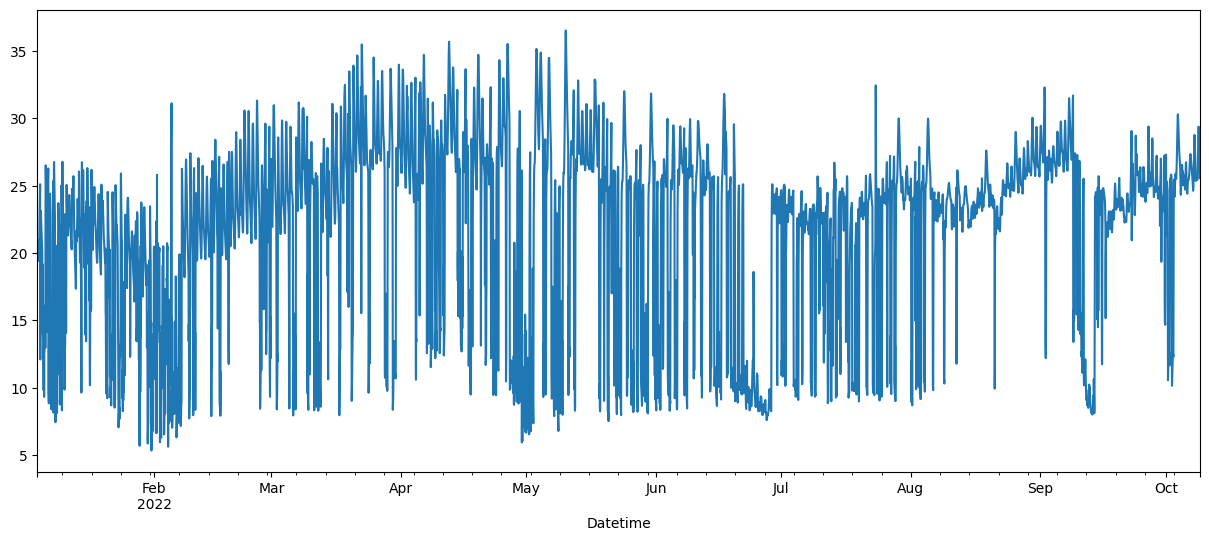

In [16]:
plt.figure(figsize=(15,6))
data.plot()
plt.show()

In [17]:
# null values
data.isnull().sum() 

0

In [18]:
# checking stationarity using Augmented Dickey-Fuller test
# if p-value is less than 0.05, then the data is stationary
from statsmodels.tsa.stattools import adfuller
adf = adfuller(data,autolag="AIC")
print("p-value: ",adf[1])

p-value:  2.694362701457249e-15


In [19]:
# there is no need to make the data stationary as it is already stationary

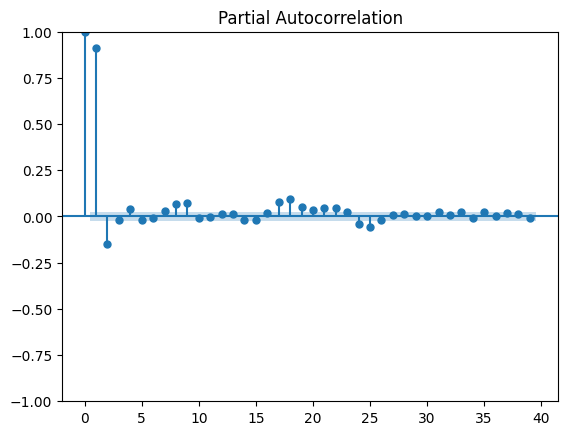

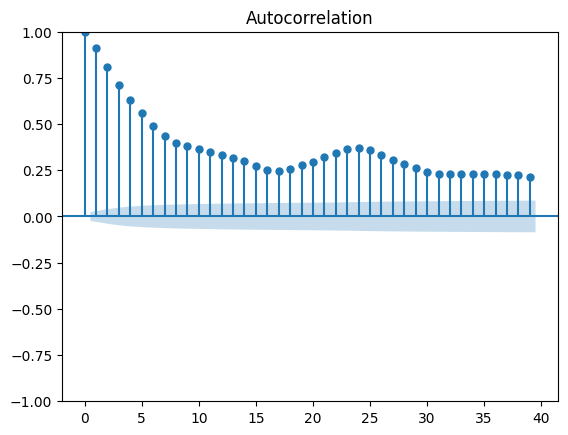

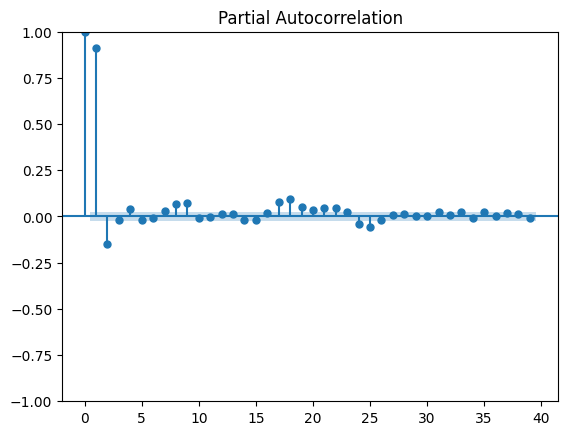

In [23]:
# finding order of ARIMA model using acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data)
plot_pacf(data)


In [22]:
# finding order of ARIMA model
from pmdarima import auto_arima
model = auto_arima(data, trace=True, error_action='ignore', suppress_warnings=True)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32370.648, Time=7.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32869.671, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32806.539, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32803.852, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32867.671, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32400.233, Time=3.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32379.281, Time=2.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32366.221, Time=4.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32368.957, Time=2.46 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=32372.888, Time=5.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32373.355, Time=4.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32369.043, Time=4.73 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=32368.489, Time=3.94 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=32367.393, Time=5.64 sec
 ARIMA(3,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6676
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -16176.672
Date:                Fri, 24 May 2024   AIC                          32363.343
Time:                        19:52:53   BIC                          32397.374
Sample:                    01-04-2022   HQIC                         32375.098
                         - 10-09-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8222      0.010     85.860      0.000       0.803       0.841
ma.L1         -0.7828      0.010    -75.462      0.000      -0.803      -0.762
ma.L2         -0.1126      0.010    -10.894      0.000      -0.133      -0.092
ma.L3         -0.0873      0.011     -7.767      0.000      -0.109      -0.065
sigma2         7.4548      0.063    117.870      0.000       7.331       7.579
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             31018.00
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(data, order=(1,1,2),freq="h")
model_fit = arima.fit()

/home/varaprasad/miniconda3/envs/llama/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [73]:
y_pred = model_fit.fittedvalues
y_pred

Datetime
2022-01-04 00:00:00     0.000000
2022-01-04 01:00:00    20.867013
2022-01-04 02:00:00    21.010315
2022-01-04 03:00:00    20.843854
2022-01-04 04:00:00    20.636307
                         ...    
2022-10-08 20:00:00    28.605066
2022-10-08 21:00:00    28.942959
2022-10-08 22:00:00    28.277520
2022-10-08 23:00:00    27.601526
2022-10-09 00:00:00    27.046357
Length: 6673, dtype: float64

In [74]:
data.head()

Datetime
2022-01-04 00:00:00    20.867
2022-01-04 01:00:00    21.000
2022-01-04 02:00:00    20.867
2022-01-04 03:00:00    20.650
2022-01-04 04:00:00    20.400
Name: DAYTON_MW, dtype: float64

In [75]:
data.tail()

Datetime
2022-10-08 20:00:00    29.367
2022-10-08 21:00:00    28.767
2022-10-08 22:00:00    28.000
2022-10-08 23:00:00    27.350
2022-10-09 00:00:00    26.800
Name: DAYTON_MW, dtype: float64

In [76]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
y_pred= y_pred[1:]
data = data[:-1]
mse = mean_squared_error(data,y_pred)
r2 = r2_score(data,y_pred)
mae = mean_absolute_error(data,y_pred)
print("Mean Squared Error: ",mse)
print("R2 Score: ",r2)
print("Mean Absolute Error: ",mae)


Mean Squared Error:  0.5251752053366984
R2 Score:  0.9888114176166456
Mean Absolute Error:  0.5590745174256404


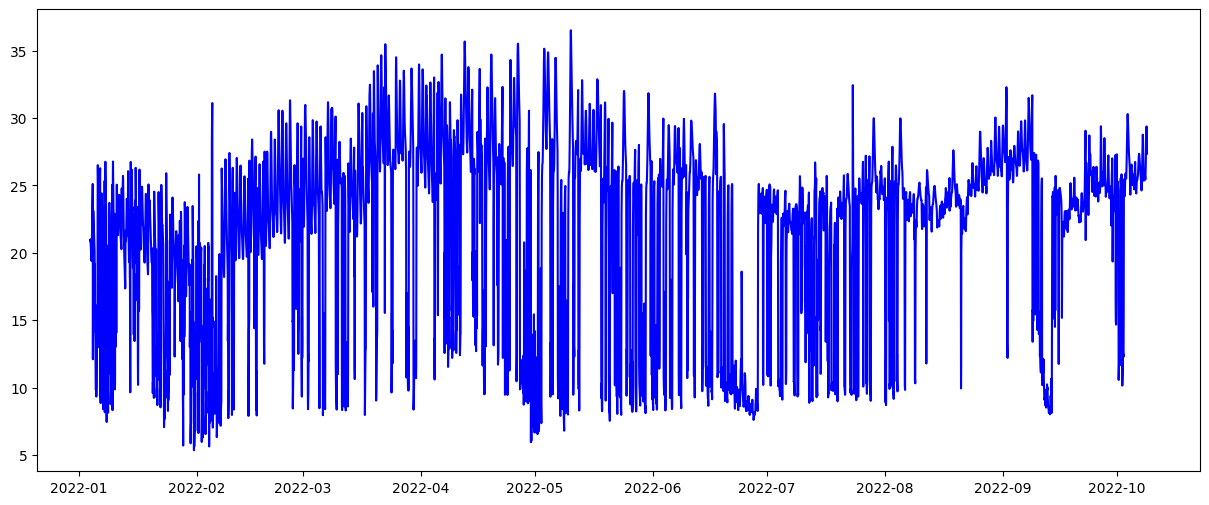

In [83]:
plt.figure(figsize=(15,6))
plt.plot(data,color="blue")
plt.show()

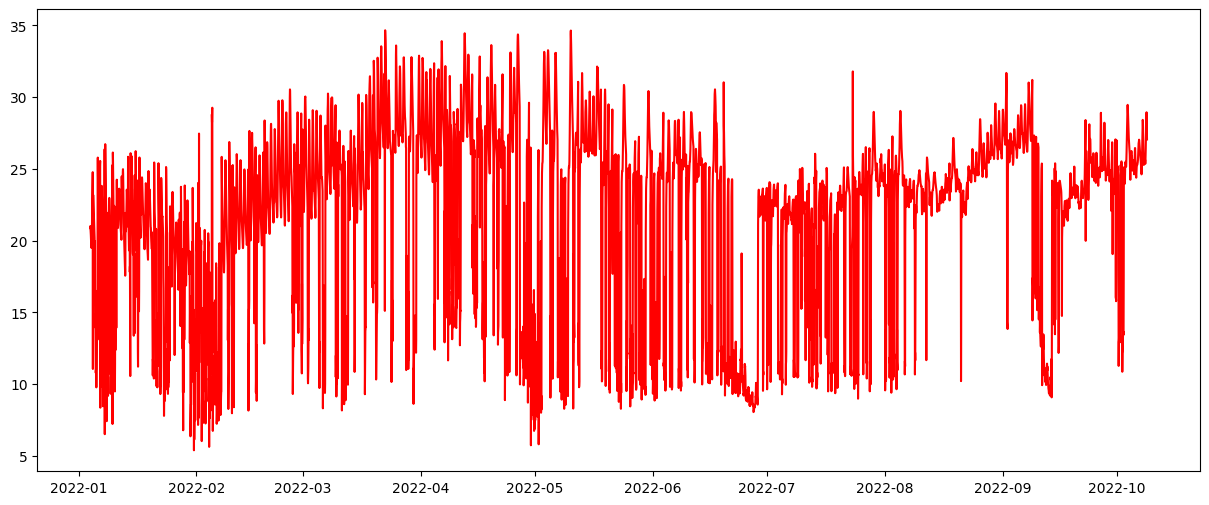

In [84]:
plt.figure(figsize=(15,6))

plt.plot(y_pred,color="red")
